In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
import pandas

# install wordcloud
! python -m pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

Defaulting to user installation because normal site-packages is not writeable


In [14]:
x = requests.get('http://localhost:5000/users').json()

In [15]:
print(x)

{'message': 'Success', 'data': {'columns': ['id', 'name', 'surname', 'age', 'location', 'tel_number', 'email', 'general_description', 'experience', 'degree_id', 'graduated'], 'entries': [[1, 'Gonzalo', 'Castro', 22, 'Buenos Aires', 111222333, 'gonza@gmail.com', 'Gonzalo is a systems engineering student at Universidad Tecnologica Nacional, Facultad Regional Buenos Aires, and a software developer based in Argentina.\n\nHis career allows him not only to understand software, systems and data analysis, but business and personnel management; lead, design and evaluate projects.\n\nStarted his professional career as a SAP Fiori Associate Consultant, being an engineer student, was formed to learn, and adapt fast. Being able to help you convert a vision and an idea into meaningful and useful product solutions.', 'Soy nuevo', 1, 1], [2, 'Roberto', 'Fulano', 22, 'Buenos Aires', 111222333, 'robert@gmail.com', 'Roberto Nicolás Savinelli has been a social sciences student (class of 2016) at Euskal Ec

In [16]:
data = x['data']

In [6]:
df = pandas.DataFrame(data=data['entries'], columns=data['columns'])

In [7]:
df.head()

,id,name,surname,age,location,tel_number,email,general_description,experience,degree_id,graduated
0,1,Gonzalo,Castro,22,Buenos Aires,111222333,gonza@gmail.com,Gonzalo is a systems engineering student at Un...,Soy nuevo,1,1
1,2,Roberto,Fulano,22,Buenos Aires,111222333,robert@gmail.com,Roberto Nicolás Savinelli has been a social sc...,Soy nuevo,2,1


In [10]:
print(requests.get(f'http://localhost:5000/user/1').json()['data']['tags'])

{'columns': ['id', 'name'], 'entries': [[1, 'Lider'], [2, 'Proactivo'], [3, 'Comprometido']]}


In [11]:
stopwords = set(STOPWORDS)

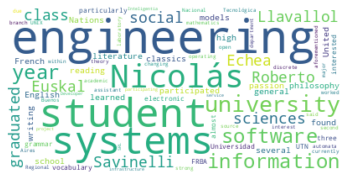

In [18]:
# instantiate a word cloud object
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
for description in df['general_description']:
    wc.generate(description)
    
# display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()